In [5]:
import numpy as np
import matplotlib.pyplot as plt
import json
file_loc = "MetricFiles\CartPole-v1\Policy\entropy.json"
thing = json.load(open(file_loc))

In [2]:
thing.keys()

dict_keys(['3', '5', '10', '20', '30', '40', '60', '80', '100', '150', '200', '250', '300', '400', '500', '600'])

In [3]:
thing['3'].keys()

dict_keys(['PercentCorrect', 'EpisodeDistance', 'Episode_Length_Distance', 'Depth', 'Breadth', 'TopSplits', 'Path'])

In [4]:
thing['3']['PercentCorrect']

[0.66,
 0.495,
 0.51,
 0.48,
 0.495,
 0.505,
 0.51,
 0.51,
 0.505,
 0.49,
 0.91,
 0.495,
 0.915,
 0.505,
 0.935,
 0.495,
 0.85,
 0.525,
 0.495,
 0.495,
 0.605,
 0.49,
 0.51,
 0.865,
 0.895,
 0.73,
 0.49,
 0.525,
 0.505,
 0.855,
 0.5,
 0.825,
 0.865,
 0.505,
 0.825,
 0.505,
 0.505,
 0.605,
 0.75,
 0.5,
 0.905,
 0.51,
 0.49,
 0.505,
 0.52,
 0.5,
 0.505,
 0.905,
 0.5,
 0.495,
 0.505,
 0.625,
 0.5,
 0.5,
 0.505,
 0.825,
 0.905,
 0.765,
 0.865,
 0.865,
 0.89,
 0.87,
 0.495,
 0.89,
 0.89,
 0.5,
 0.5,
 0.86,
 0.78,
 0.5,
 0.495,
 0.495,
 0.51,
 0.505,
 0.49,
 0.495,
 0.52,
 0.815,
 0.825,
 0.495,
 0.68,
 0.745,
 0.845,
 0.505,
 0.505,
 0.495,
 0.51,
 0.485,
 0.495,
 0.505,
 0.505,
 0.89,
 0.53,
 0.795,
 0.865,
 0.505,
 0.82,
 0.885,
 0.495,
 0.495,
 0.505,
 0.505,
 0.495,
 0.5,
 0.59,
 0.505,
 0.73,
 0.83,
 0.495,
 0.87,
 0.495,
 0.485,
 0.495,
 0.51,
 0.5,
 0.88,
 0.66,
 0.495,
 0.75,
 0.495,
 0.82,
 0.94,
 0.505,
 0.69,
 0.525,
 0.845,
 0.505,
 0.495,
 0.505,
 0.72,
 0.51,
 0.505,
 0.495,
 

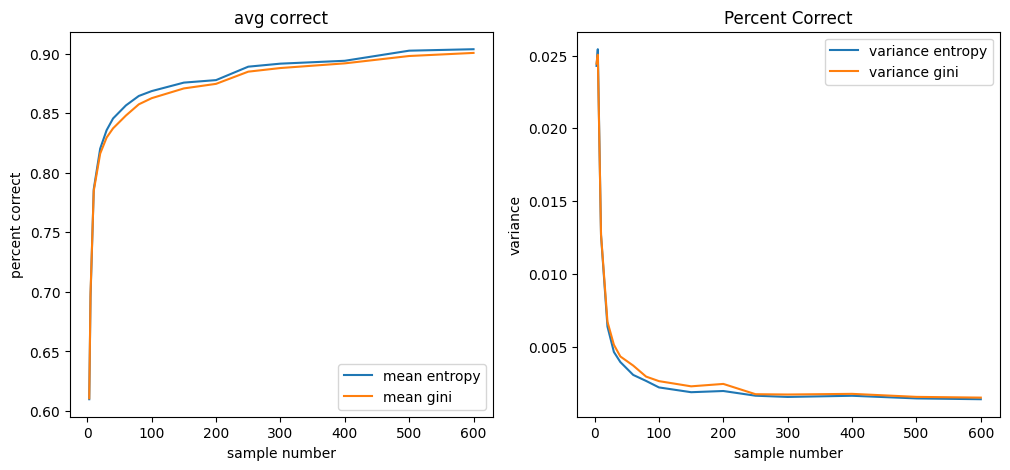

In [15]:


file_loc1 = "MetricFiles\CartPole-v1\Policy\entropy.json"
file_loc2 = "MetricFiles\CartPole-v1\Policy\gini.json"
thing1 = json.load(open(file_loc1))
thing2 =json.load(open(file_loc2))
query_var = "PercentCorrect"
means_entropy = []
means_gini = []
vars_gini = []
vars_entropy = []

x = []
for i in thing1.keys():
    means_entropy.append(np.mean(thing1[i][query_var]))
    means_gini.append(np.mean(thing2[i][query_var]))
    vars_gini.append(np.var(thing2[i][query_var]))
    vars_entropy.append(np.var(thing1[i][query_var]))
    x.append(float(i))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(x, means_entropy, label = 'mean entropy')
ax1.plot(x, means_gini, label = "mean gini")
ax1.set_xlabel("sample number")
ax1.set_ylabel("percent correct")
ax1.set_title("avg correct")
ax1.legend()

ax2.plot(x, vars_entropy, label = 'variance entropy')
ax2.plot(x, vars_gini, label = "variance gini")
ax2.set_xlabel("sample number")
ax2.set_ylabel("variance")
ax2.set_title("variance or percent correct")
ax2.legend()
plt.title("Percent Correct")
plt.show()

In [48]:
import numpy as np
from collections import Counter
print(json_files[keys[0]][sample_set[-1]].keys())
print()
print(Counter(json_files[keys[0]][sample_set[0]]["TopSplits"]))

dict_keys(['PercentCorrect', 'UniformCorrect', 'EpisodeDistance', 'Episode_Length_Distance', 'Depth', 'Breadth', 'TopSplits', 'Path'])

Counter({'ang_vel_joint1': 2838, 'ang_vel_joint2': 642, 'sin_joint2': 411, 'cos_joint2': 375, 'sin_joint1': 367, 'cos_joint1': 367})


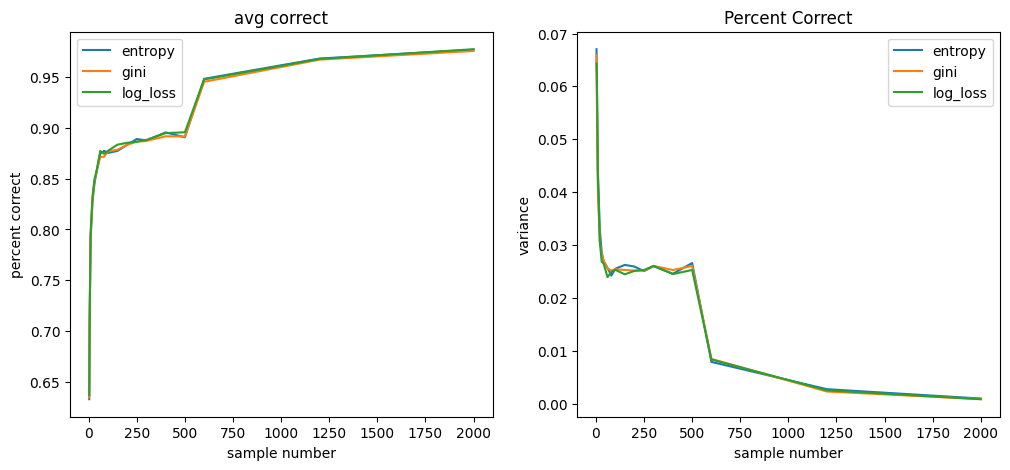

2000


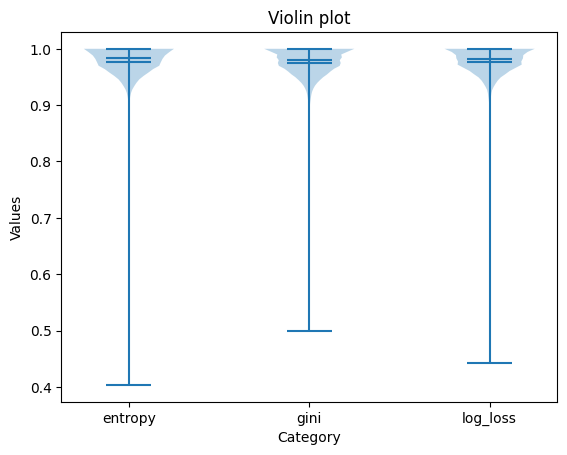

('entropy', 'gini')
T-statistic: 2.043523033598002
P-value: 0.041026844992140384

('entropy', 'log_loss')
T-statistic: -0.7722521470860915
P-value: 0.4399833551848473

('gini', 'log_loss')
T-statistic: -2.916450590773297
P-value: 0.0035482595757680853



In [10]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from scipy import stats
import itertools


Metric = "PercentCorrect"
file_loc = "MetricFiles/acrobot/Policy/"
json_files = {}
for i in os.listdir(file_loc):
    json_files[i[:-5]] = json.load(open(file_loc+i))

keys = list(json_files.keys())
sample_set = list(json_files[keys[0]].keys())

means = {}
vars = {}
x = []
for i in keys:
    means[i] = []
    vars[i] = []
for sample_num in sample_set:
    x.append(float(sample_num))
    for i in keys:
        means[i].append(np.mean(json_files[i][sample_num][Metric]))
        vars[i].append(np.var(json_files[i][sample_num][Metric]))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for i in means.keys():
    ax1.plot(x, means[i], label = i)
for i in vars.keys():
    ax2.plot(x, vars[i], label = i)


ax1.set_xlabel("sample number")
ax1.set_ylabel("percent correct")
ax1.set_title("avg correct")
ax1.legend()


ax2.set_xlabel("sample number")
ax2.set_ylabel("variance")
ax2.set_title("variance or percent correct")
ax2.legend()
plt.title("Percent Correct")
plt.show()
plt.clf()
print(sample_set[-1])

data = [json_files[i][sample_set[-1]][Metric] for i in keys]

# Create a violin plot
plt.violinplot(data, showmeans=True, showmedians=True)

# Add title and labels
plt.title('Violin plot')
plt.xlabel('Category')
plt.ylabel('Values')

# Optionally, customize the x-axis ticks
plt.xticks(range(1,len(keys) + 1), keys)

# Show the plot
plt.show()
for i in list(itertools.combinations(keys, 2)):
    t_stat, p_value = stats.ttest_ind(json_files[i[0]][sample_set[-1]][Metric], json_files[i[1]][sample_set[-1]][Metric])
    print(i)
    print("T-statistic:", t_stat)
    print("P-value:", p_value)
    print()


2000


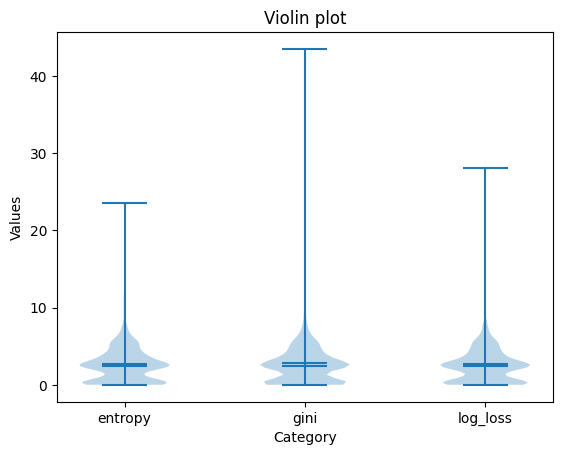

('entropy', 'gini')
T-statistic: -0.9049370342583672
P-value: 0.36552055110243986

('entropy', 'log_loss')
T-statistic: 0.9677805301537403
P-value: 0.333177399014672

('gini', 'log_loss')
T-statistic: 1.8144748150746786
P-value: 0.06963461357612023



In [31]:
import matplotlib.pyplot as plt
import numpy as np
print(sample_set[-1])

data = [json_files[i][sample_set[-1]][Metric] for i in keys]

# Create a violin plot
plt.violinplot(data, showmeans=True, showmedians=True)

# Add title and labels
plt.title('Violin plot')
plt.xlabel('Category')
plt.ylabel('Values')

# Optionally, customize the x-axis ticks
plt.xticks(range(1,len(keys) + 1), keys)

# Show the plot
plt.show()
for i in list(itertools.combinations(keys, 2)):
    t_stat, p_value = stats.ttest_ind(json_files[i[0]][sample_set[-1]][Metric], json_files[i[1]][sample_set[-1]][Metric])
    print(i)
    print("T-statistic:", t_stat)
    print("P-value:", p_value)
    print()

In [32]:
print(list(itertools.combinations(keys, 2)))

[('entropy', 'gini'), ('entropy', 'log_loss'), ('gini', 'log_loss')]
